<img src="mioti.png" style="height: 100px">
<center style="color:#888">Asignatura Deep Learning</center>

# Clasificación de Secuencias

## Objetivos 

El objetivo de este notebook es continuar nuestro trabajo con secuencias a partir del ejemplo visto en el worksheet.

### Punto de partida

Como hemos hecho en otras ocasiones, para este notebook vamos a comenzar como punto de partida con el código visto en el worksheet sobre el que realizaremos las modificaciones necesarias.

Es preferible trabajar en colab con Runtime Type: GPU para poder trabajar con todos los datos sin que nos tome una eternidad.

In [ ]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb

max_features = 20000
maxlen = 150  # número máximo de palabras que tendrán nuestras opiniones
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print('Train...')
x_train = x_train[1:2500,:]
y_train = y_train[1:2500]

x_test = x_test[1:2500,:]
y_test = y_test[1:2500]

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 150)
x_test shape: (25000, 150)
Build model...
Train...
Epoch 1/15
79/79 [==============================] - 6s 45ms/step - loss: 0.6755 - accuracy: 0.5778 - val_loss: 0.5682 - val_accuracy: 0.6947
Epoch 2/15
79/79 [==============================] - 3s 37ms/step - loss: 0.4568 - accuracy: 0.8147 - val_loss: 0.5546 - val_accuracy: 0.7479
Epoch 3/15
79/79 [==============================] - 3s 38ms/step - loss: 0.2550 - accuracy: 0.9196 - val_loss: 0.4625 - val_accuracy: 0.8195
Epoch 4/15
79/79 [==============================] - 3s 37ms/step - loss: 0.1548 - accuracy: 0.9508 - val_loss: 0.9491 - val_accuracy: 0.7095
Epoch 5/15
79/79 [==============================] - 3s 37ms/step - loss: 0.0871 - accuracy: 0.9756 - val_loss: 0.5455 - val_accuracy: 0.8231
Epoch 6/15
79/79 [==============================] - 3s 37ms/step - loss: 0.0628 - accuracy: 0.9808 - val_loss: 0.6398 - val_ac

### Análisis del rendimiento [1 pto]

Vamos a empezar por mejorar nuestra capacidad de evaluar el modelo. Añadid a continuación el código necesario poder ver las curvas de entrenamiento de forma gráfica. A continuación, reentrenad la red y mostradlas. ¿Qué dirías del rendimiento de nuestro modelo?

In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
# Seleccionamos un tamaño de letra que se pueda leer.
matplotlib.rcParams.update({'font.size': 12})

def print_result(my_history,my_dropout=None):

    acc = my_history.history['accuracy']
    val_acc = my_history.history['val_accuracy']

    loss = my_history.history['loss']
    val_loss = my_history.history['val_loss']

    # Extraemos el número de épocas
    epochs = range(len(acc))

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(14,5))
    # Representamos con plot nuestro accuracy por epoch
    ax1.plot(epochs, acc, label = 'train_acc')
    ax1.plot(epochs, val_acc, label = 'val_acc')
    if (my_dropout):
      title= 'Training and validation accuracy with dropout rate = '+str(my_dropout)
    else:
      title= 'Training and validation accuracy'

    ax1.set_title(title)
    ax1.legend()
    

    # Representamos con plot nuestro loss por epoch
    ax2.plot(epochs, loss, label = 'loss')
    ax2.plot(epochs, val_loss, label = 'val_loss')
    if (my_dropout):
      title= 'Training and validation loss with dropout rate = '+str(my_dropout)
    else:
      title= 'Training and validation loss'

    ax2.set_title(title)
    ax2.legend()
    fig.suptitle('Resultados')
    
    plt.show()
    

    return None

In [ ]:
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))

Epoch 1/15
79/79 [==============================] - 3s 37ms/step - loss: 3.8379e-05 - accuracy: 1.0000 - val_loss: 1.4095 - val_accuracy: 0.8043
Epoch 2/15
79/79 [==============================] - 3s 36ms/step - loss: 0.0141 - accuracy: 0.9976 - val_loss: 1.1541 - val_accuracy: 0.8079
Epoch 3/15
79/79 [==============================] - 3s 36ms/step - loss: 0.0033 - accuracy: 0.9996 - val_loss: 1.3224 - val_accuracy: 0.8035
Epoch 4/15
79/79 [==============================] - 3s 36ms/step - loss: 0.0084 - accuracy: 0.9992 - val_loss: 1.1845 - val_accuracy: 0.8103
Epoch 5/15
79/79 [==============================] - 3s 36ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 1.1861 - val_accuracy: 0.8091
Epoch 6/15
79/79 [==============================] - 3s 36ms/step - loss: 1.6254e-05 - accuracy: 1.0000 - val_loss: 1.4874 - val_accuracy: 0.8047
Epoch 7/15
79/79 [==============================] - 3s 36ms/step - loss: 4.9194e-04 - accuracy: 0.9996 - val_loss: 1.2755 - val_accuracy: 0.8099
E

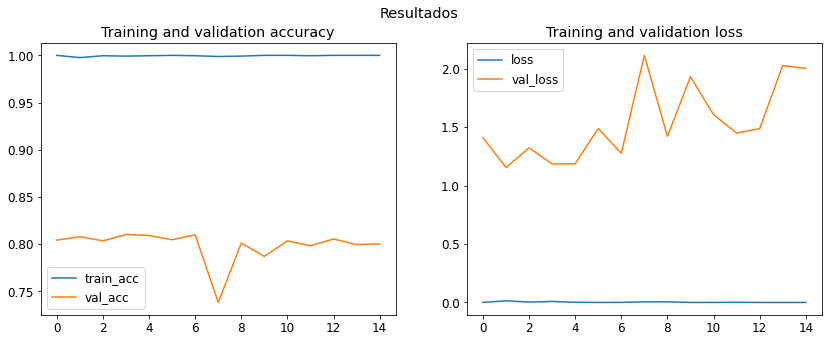

In [ ]:
print_result(history)

### Dropout [1 pto]

Vamos a empezar a modificar el código añadiendo Dropout, lo que idealmente nos va a permitir mejorar el entrenamiento y reducir el sobreentramiento.

A continuación copiad y pegad el código anterior y realizar las modificaciones necesarias para:
- Realizar dropout sobre la capa Embedding con una probabilidad del 40%
- Realizar dropout sobre la capa LSTM con una probabilidad del 40%

Recordad mostrar las curvas de entrenamiento.

Uno de los efectos que podemos observar (y convendría recordar) cuando realizamos dropout es que a la red le cuesta más entrenar y tarda más en mejorar los resultados de train. A cambio, debería tener un menor sobreentrenamiento y, aunque tarde más, el resultado final suele mejorar.

¿Qué rendimiento se observa ahora en nuestro modelo a juzgar por las gráficas?

In [ ]:
# Construimos el nuevo modelo con las indicaciones de Dropout al 0,4
print('Build model...')
model_2=None
model_2 = Sequential(name='Model_with_Droput_Layers')
model_2.add(Embedding(max_features, 32))
model_2.add(Dropout(0.4))
model_2.add(LSTM(32))
model_2.add(Dropout(0.4))
model_2.add(Dense(1, activation='sigmoid'))

#Compilamos el modelo
model_2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Visualizamos la arquitectura y los parámetros
model_2.summary()
#Entrenamos el modelo
history_2=model_2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))

#Evaluamos con la parte de test.
score, acc = model_2.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Model: "Model_with_Droput_Layers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          640000    
                                                                 
 dropout (Dropout)           (None, None, 32)          0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 648,353
Trainable params: 648,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
79/79 [===

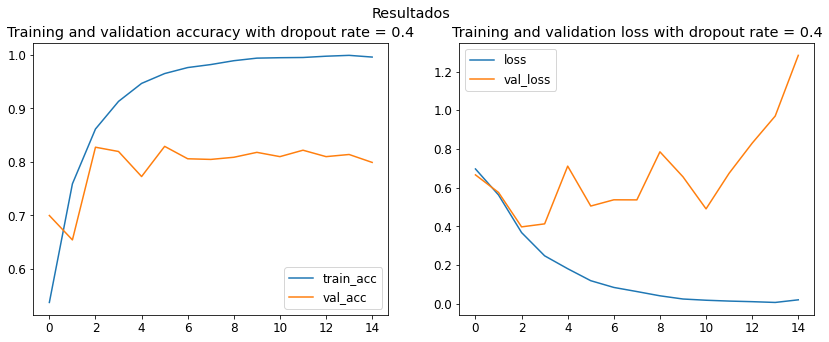

In [ ]:
print_result(history_2,my_dropout=0.4)

### CNNs + LSTMs + DNNs! [1 pto]

En este apartado vamos a intentar realizar una modificación un poco más compleja a nuestro sistema base.

Como sabemos, las redes Convolucionales o CNN están inspiradas en la vista humana y son muy buenas en la extracción de características sobre imágenes. Además de esto, han sido aplicadas con éxito a señales como la señal de audio o incluso señales temporales como los precios de un stock en el mercado de valores.

Sin embargo, para trabajar con secuencias, sabemos que la mejor opción son las redes recurrentes, donde destaca particularmente la red LSTM.

Una de las mejores cualidades de las redes neuronales es que son muy flexibles y podemos implementar fácilmente casi cualquier arquitectura que imaginemos. En este apartado vamos a utilizar una red que está siendo utilizada a día de hoy en muchisimos sistemas de empresas como Google, Amazon o Facebook, que lideran cláramente este campo. 

Esta red es una combinación de redes convolucionales, recurrentes, y feed-forward. ¿Por qué esta combinación?
- Las redes convolucionales son buenas como extractor de características y pueden encontrar información muy útil de forma local, sobre pequeños campos receptivos de los datos de entrada
- Las redes LSTM son buenas para modelar cualquier tipo de secuencia, ya que pueden aprender del pasado y tener en cuenta el contexto
- Las redes DNN son buenas aprendiendo cualquier tipo de transformación no lineal, y por tanto en nuestro ejemplo las vamos a utilizar para extraer la salida de las LSTM y convertirla en la solución a la tarea que estamos intentando resolver


Manos a la obra, qué necesitamos para introducir estos cambios?
- Importar las nuevas capas que vamos a necesitar, que son las siguientes: 
    - Conv1D , es como Conv2D pero trabaja con datos de 1 sóla dimensión.
    - MaxPooling1D , lo mismo
- Modificar el modelo añadiendo las capas necesarias, buscad en la documentación de keras o en algún ejemplo en google la sintaxis. Ojo!! la sintaxis ha ido cambiando con las versiones, aunque los cambios son mínimos y suelen mostrarse en el error que nos de.
- Al estar trabajando con Conv1D y MaxPooling1D no necesitamos ningún reshape, ya que todo va a estar siempre en una dimensión.


¿Cómo va a ser nuestro modelo?
- Definimos un modelo de tipo secuencial
- Capa de Embedding igual que la de origen
- Capa convolucional de una dimensión, con 32 filtros y campo receptivo 3
- Capa de pooling de 1 dimensión, con tamaño de pool 2
- LSTM de tamaño 128, igual que la de origen
- Capa de salida, igual que la de origen.

A continuación deberemos copiar y pegar el código de origen y realizar los cambios mencionados, recordad mostrar las curvas de aprendizaje y analizar los resultados.

In [ ]:

# Construimos el nuevo modelo con las indicaciones correspondienes para incluir
#una CNN, una LSTM, y una DNN
print('Build model...')
model_3=None
model_3 = Sequential(name='Model_CNN_LSTM_DNN')
model_3.add(Embedding(max_features, 32))
model_3.add(Conv1D(32,3,activation='relu'))
model_3.add(MaxPooling1D(2))
model_3.add(LSTM(128))
model_3.add(Dense(1, activation='sigmoid'))

#Compilamos el modelo
model_3.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Visualizamos la arquitectura y los parámetros
model_3.summary()
#Entrenamos el modelo
history_3=model_3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))

#Evaluamos con la parte de test.
score, acc = model_3.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Model: "Model_CNN_LSTM_DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          640000    
                                                                 
 conv1d (Conv1D)             (None, None, 32)          3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 32)         0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 128)               82432     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 725,665
Trainable params: 725,665
Non-trainable params: 0
___________________________

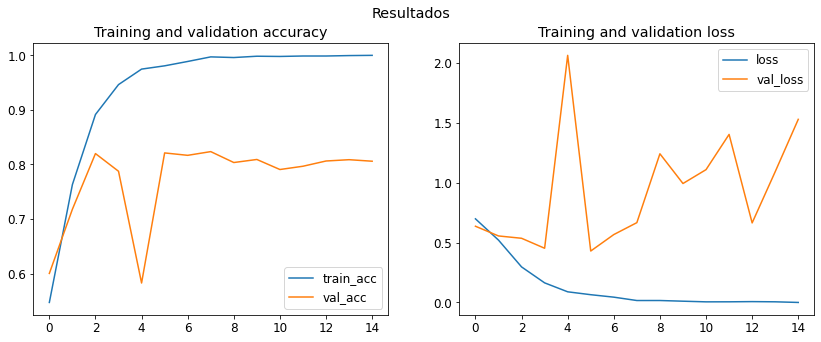

In [ ]:
print_result(history_3)

### Optimización del resultado [1 pto]

Si nos fijamos en los resultados, vemos que estamos implantando modelos más y más complejos pero no mejoramos mucho el resultado final. Esto se debe a que estamos utilizando datos muy limitados (más aún si no estamos utilizando todos los datos).

Dado que esta es la última práctica (^^) vamos a intentar mezclar lo aprendido de forma un poco más creativa. El factor limitante para los resultados obtenidos con esta red es la cantidad de datos. Una vez estamos utilizando todos los datos (en colab) es posible que lleguemos al modelo óptimo en menos épocas. ¿Cómo sabemos cuantas épocas? ¿Y el LR que debemos utilizar? Vamos a por ello:

En el apartado final, vamos a intentar optimizar el resultado de nuestra red neuronal, para ello vamos a aumentar el número de datos a utilizar, y además podemos probar todo lo que se nos ocurra para hacer este entrenamiento más eficiente. 

Dejamos unas cuantas ideas que podrían servir de ayuda, sin embargo, no es necesario que dediquéis demasiado tiempo y probeis todas las opciones, tan solo os ofrecemos la posibilidad de jugar :)
- Separar parte del conjunto de train y utilizarlo como validación, esto nos servirá para comprobar el resto de tareas más fácilmente
- Utilizar el callback ReduceLROnPlateau para librarnos de elegir un buen LR, empezamos con un LR un poco alto y lo dejamos bajar.
- Modificar el bucle para programar un criterio de parada, o utilizar el callback EarlyStopping para que se haga de forma automática
- Guardar el mejor resultado obtenido durante el entrenamiento (utilizando el conjunto de validación) para quedarnos con este en lugar de con el último
- ¿Qué más se os ocurre? Es el momento de curiosear en google a ver qué más podemos mejorar, cambiar o trastear :)

Por último, no olvideis escribir al final del documento vuestras impresiones acerca de cómo han afectado estos cambios o vuestra percepción acerca del rendimiento y nuestra red. Podéis serviros tanto de los resultados que observeis como de las nociones teóricas que tenemos.

### Fase 1: Ampliamos el número de datos, generamos un conjunto de validación , aumentamos batch_size=512, insertamos capa Dropout de 0.3

In [ ]:
# Vamos ampliar el número de Datos. Ya que disponemos de 25000 opiniones tanto
# para la parte de train y otras 25000 para la del test. Subiremos a tomar todos los datos. 
# De estos los 25000 de la parte de train, tomaremos el 10% para la parte de validación.

print('Loading data...')
(x_train_total, y_train_total), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train_total), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train_total = sequence.pad_sequences(x_train_total, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train_total.shape)
print('x_test shape:', x_test.shape)

print('Train & Validation...')
x_train = x_train_total[1:22500,:]
y_train = y_train_total[1:22500]
#Validación
x_val = x_train_total[22500:25000,:]
y_val = y_train_total[22500:25000]
#Test
x_test = x_test[1:25000,:]
y_test = y_test[1:25000]


print(len(x_train), 'train sequences')
print(len(x_val), 'val sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 150)
x_test shape: (25000, 150)
Train & Validation...
22499 train sequences
2500 val sequences
24999 test sequences


In [ ]:
def exec_DNN (x_train, y_train, x_valid, y_valid, x_test, y_test,my_epochs=15,my_verbose=1, my_dropout_rate=0.4,my_batch_size=32,my_callbacks=None,my_optimizer='rmsprop'):
  model=None
  model = Sequential(name='Model_CNN_LSTM_DNN')
  model.add(Embedding(max_features, 32))
  model.add(Dropout(my_dropout_rate))
  model.add(Conv1D(32,3,activation='relu'))
  model.add(MaxPooling1D(2))
  model.add(LSTM(128))
  model.add(Dropout(my_dropout_rate))
  model.add(Dense(1, activation='sigmoid'))

  #Compilamos el modelo
  model.compile(loss='binary_crossentropy',
                optimizer=my_optimizer,
                metrics=['accuracy'])

  # Visualizamos la arquitectura y los parámetros
  model.summary()
  #Entrenamos el modelo
  history=model.fit(x_train, y_train,
            batch_size=my_batch_size,
            epochs=my_epochs,
            verbose=my_verbose,
            validation_data=(x_valid, y_valid),
            callbacks=my_callbacks)

  #Evaluamos con la parte de test.
  score, acc = model.evaluate(x_test, y_test,
                              batch_size=batch_size)
  print("test loss: %.2f" % score)
  print("test accuracy: %.2f%%" % (acc * 100))

  return history

Model: "Model_CNN_LSTM_DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          640000    
                                                                 
 dropout (Dropout)           (None, None, 32)          0         
                                                                 
 conv1d (Conv1D)             (None, None, 32)          3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 32)         0         
 )                                                               
                                                                 
 lstm_2 (LSTM)               (None, 128)               82432     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                

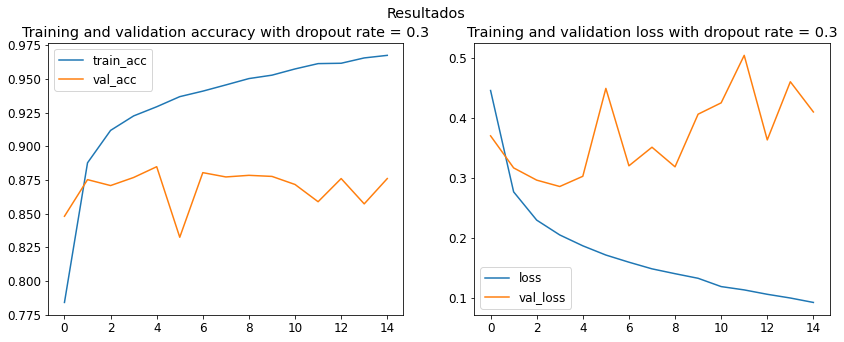

In [ ]:
dropout_rate=0.3
batch_size=512

history=exec_DNN(x_train,
         y_train,
         x_val,
         y_val,
         x_test,
         y_test,
         my_dropout_rate=dropout_rate)

print_result(history,my_dropout=dropout_rate)

### Fase 2: Mejoras Fase 1 + añadimos un callback ReduceLROnPlateau y ampliamos epoch a 30

Model: "Model_CNN_LSTM_DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          640000    
                                                                 
 dropout_2 (Dropout)         (None, None, 32)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 32)          3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 32)         0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 128)               82432     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                

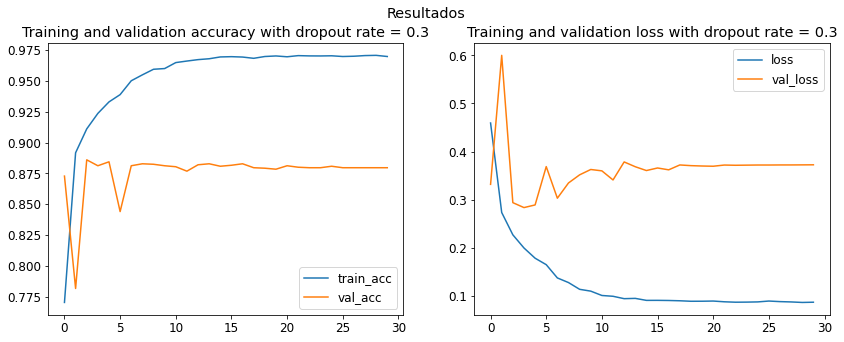

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
# Creamos el Callback y aumentamos epochs
num_epochs=30
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2,verbose=1)
my_callbacks=[reduce_lr]

history=exec_DNN(x_train,
         y_train,
         x_val,
         y_val,
         x_test,
         y_test,
         my_dropout_rate=dropout_rate,
         my_callbacks=my_callbacks,my_epochs=num_epochs)

print_result(history,my_dropout=dropout_rate)

### Fase 3: Mejoras Fase 2 + Callback EarlyStopping

Model: "Model_CNN_LSTM_DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          640000    
                                                                 
 dropout_4 (Dropout)         (None, None, 32)          0         
                                                                 
 conv1d_2 (Conv1D)           (None, None, 32)          3104      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, None, 32)         0         
 1D)                                                             
                                                                 
 lstm_4 (LSTM)               (None, 128)               82432     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                

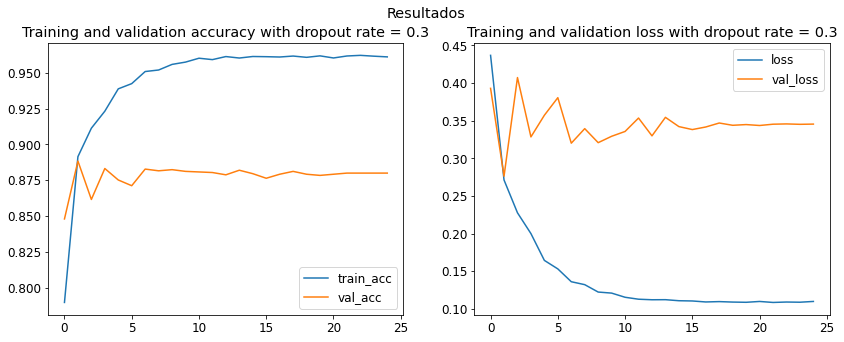

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
# Creamos el Callback y aumentamos epochs

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2,verbose=1)
early_stp = EarlyStopping(monitor='loss', patience=3,verbose=1)
my_callbacks=[reduce_lr,early_stp]
num_epochs=30

history=exec_DNN(x_train,
         y_train,
         x_val,
         y_val,
         x_test,
         y_test,
         my_dropout_rate=dropout_rate,
         my_callbacks=my_callbacks,my_epochs=num_epochs)

print_result(history,my_dropout=dropout_rate)

### Fase 4: Mejoras Fase 3 + Nuevo Optimizador Adams

Model: "Model_CNN_LSTM_DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 32)          640000    
                                                                 
 dropout_10 (Dropout)        (None, None, 32)          0         
                                                                 
 conv1d_5 (Conv1D)           (None, None, 32)          3104      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, None, 32)         0         
 1D)                                                             
                                                                 
 lstm_7 (LSTM)               (None, 128)               82432     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                

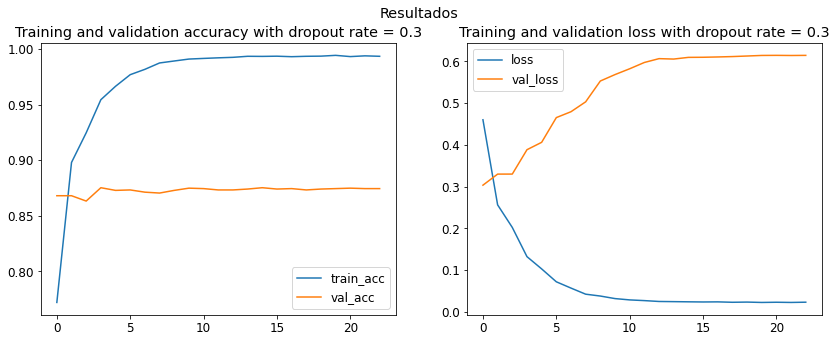

In [ ]:
from tensorflow.keras.optimizers import Adam,SGD

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2,verbose=1)
early_stp = EarlyStopping(monitor='loss', patience=3,verbose=1)
my_callbacks=[reduce_lr,early_stp]
opt = Adam(learning_rate=0.01)
num_epochs=30

history=exec_DNN(x_train,
         y_train,
         x_val,
         y_val,
         x_test,
         y_test,
         my_dropout_rate=dropout_rate,
         my_callbacks=my_callbacks,
         my_epochs=num_epochs,
         my_optimizer=opt)

print_result(history,my_dropout=dropout_rate)

